# Hotel Reviews Sentiment Analysis

## Data Source

https://www.kaggle.com/datasets/andrewmvd/trip-advisor-hotel-reviews

## Import Libraries

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/nadezdagileva/nltk_data...


True

## Load Data

In [14]:
data = pd.read_csv("tripadvisor_hotel_reviews.csv")
print(data.head())

                                              Review  Rating
0  nice hotel expensive parking got good deal sta...       4
1  ok nothing special charge diamond member hilto...       2
2  nice rooms not 4* experience hotel monaco seat...       3
3  unique, great stay, wonderful time hotel monac...       5
4  great stay great stay, went seahawk game aweso...       5


## Data Analysis

In [13]:
# Create a SentimentIntensityAnalyzer object
sentiments = SentimentIntensityAnalyzer()

Rating
1    1421
2    1793
3    2184
4    6039
5    9054
dtype: int64


<Axes: >

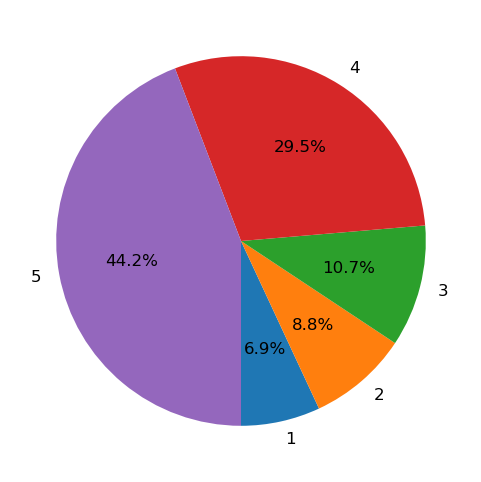

In [21]:
# Plot
# Count the number of reviews by rating
rating_counts = data.groupby(['Rating']).size()
print(rating_counts)

# Visualize the rating
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)
rating_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12, label="")

In [15]:
# polarity_scores method of SentimentIntensityAnalyzer object gives a sentiment dictionary, 
# which contains pos, neg, neu and compound scores.
sentiments = SentimentIntensityAnalyzer()
data["Positive (%)"] = [sentiments.polarity_scores(i)["pos"]*100 for i in data["Review"]]
data["Negative (%)"] = [sentiments.polarity_scores(i)["neg"]*100 for i in data["Review"]]
data["Neutral (%)"] = [sentiments.polarity_scores(i)["neu"]*100 for i in data["Review"]]
print(data.head())

                                              Review  Rating  Positive (%)  \
0  nice hotel expensive parking got good deal sta...       4          28.5   
1  ok nothing special charge diamond member hilto...       2          18.9   
2  nice rooms not 4* experience hotel monaco seat...       3          21.9   
3  unique, great stay, wonderful time hotel monac...       5          38.5   
4  great stay great stay, went seahawk game aweso...       5          22.1   

   Negative (%)  Neutral (%)  
0           7.2         64.3  
1          11.0         70.1  
2           8.1         70.0  
3           6.0         55.5  
4          13.5         64.3  


In [17]:
# Decide sentiment as positive, negative and neutral
x = sum(data["Positive (%)"])
y = sum(data["Negative (%)"])
z = sum(data["Neutral (%)"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 
